# Multi Plane 2D model
- The solver is in the package "Model_2D_Package"
- Solves for however nk number of k:s
- Currently running tf = 50 and nu = 100 (dicretization of control)

In [191]:
%reset -f

In [229]:

import matplotlib.pyplot as plt
from casadi import *
import numpy as np

import importlib
import Model_2D_Package.Multi_Plane_2D_solver as model
importlib.reload(model)

<module 'Model_2D_Package.Multi_Plane_2D_solver' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\Model_2D\\Model_2D_Package\\Multi_Plane_2D_solver.py'>

Total number of variables............................:     3101
                     variables with only lower bounds:      601
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      600
Total number of equality constraints.................:     3000
Total number of inequality constraints...............:     1206
        inequality constraints with only lower bounds:      606
   inequality constraints with lower and upper bounds:      600
        inequality constraints with only upper bounds:        0


Number of Iterations....: 470

                                   (scaled)                 (unscaled)
Objective...............:  -7.4258776316238325e+01   -7.4258776316238325e+01
Dual infeasibility......:   5.6325855028943146e-11    5.6325855028943146e-11
Constraint violation....:   9.5191727323642769e-10    1.1444853953435086e-09
Variable bound violation:   9.8063465403530614e-09    9.8063465403530614e-09
Complementar

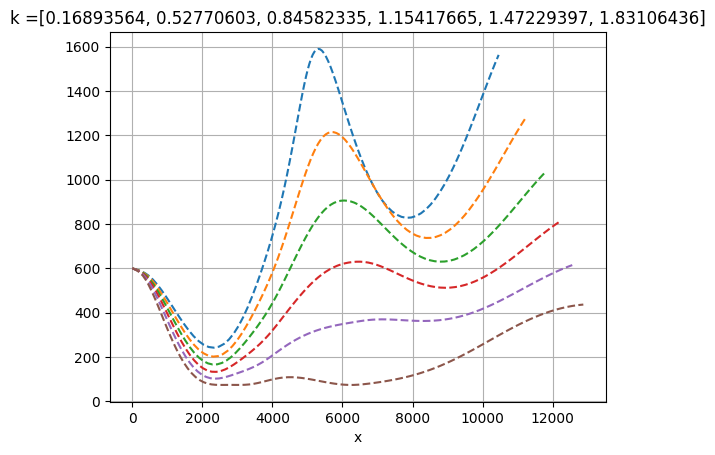

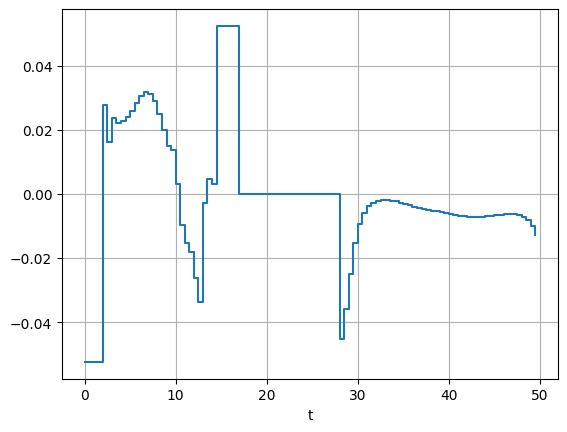

In [134]:
k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)

In [65]:
k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h_k_sym(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)

Total number of variables............................:     2481
                     variables with only lower bounds:      481
                variables with lower and upper bounds:       80
                     variables with only upper bounds:      480
Total number of equality constraints.................:     2400
Total number of inequality constraints...............:      966
        inequality constraints with only lower bounds:      486
   inequality constraints with lower and upper bounds:      480
        inequality constraints with only upper bounds:        0


Number of Iterations....: 507

                                   (scaled)                 (unscaled)
Objective...............:  -7.4258776558869528e+01   -7.4258776558869528e+01
Dual infeasibility......:   6.6749733417814353e-09    6.6749733417814353e-09
Constraint violation....:   2.0463630789890885e-11    2.0463630789890885e-11
Variable bound violation:   9.9297453176605543e-09    9.9297453176605543e-09
Complementar

In [118]:
k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h_k_sym(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)

Total number of variables............................:     3101
                     variables with only lower bounds:      601
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      600
Total number of equality constraints.................:     3000
Total number of inequality constraints...............:     1206
        inequality constraints with only lower bounds:      606
   inequality constraints with lower and upper bounds:      600
        inequality constraints with only upper bounds:        0


Number of Iterations....: 575

                                   (scaled)                 (unscaled)
Objective...............:  -7.4258776316239860e+01   -7.4258776316239860e+01
Dual infeasibility......:   3.5263949773401107e-10    3.5263949773401107e-10
Constraint violation....:   3.1468516681343317e-10    3.3115554742835224e-10
Variable bound violation:   9.8063465403530614e-09    9.8063465403530614e-09
Complementar

# Compute State Trajectories from given control and k

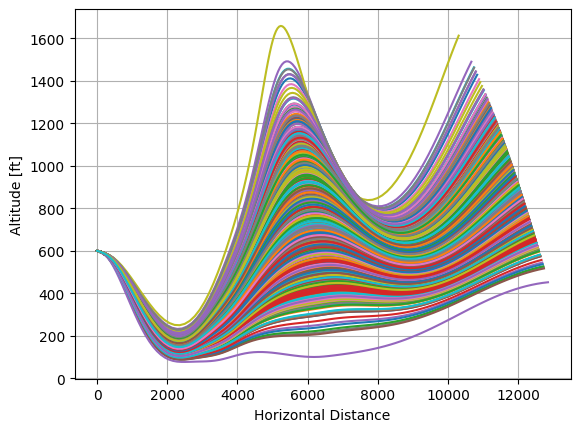

76.72095262563626


In [138]:
M = 1000

k_samples = np.random.normal(loc=1.0, scale=0.25, size=M)
min_hs = []
plt.figure()
for i in range(M):
    sol = model.reconstruction_multi_plane_2D(model.u_opt_return(w_opt),k_samples[i],1)
    min_hs.append(min(sol['h']))
    plt.plot(sol['x'], sol['h'])
    
plt.xlabel('Horizontal Distance')
plt.ylabel('Altitude [ft]')
plt.grid(True)
plt.show()
print(min(min_hs))


Total number of variables............................:     3101
                     variables with only lower bounds:      601
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      600
Total number of equality constraints.................:     3000
Total number of inequality constraints...............:     1206
        inequality constraints with only lower bounds:      606
   inequality constraints with lower and upper bounds:      600
        inequality constraints with only upper bounds:        0


Number of Iterations....: 470

                                   (scaled)                 (unscaled)
Objective...............:  -7.4258776316238325e+01   -7.4258776316238325e+01
Dual infeasibility......:   5.6325855028943146e-11    5.6325855028943146e-11
Constraint violation....:   9.5191727323642769e-10    1.1444853953435086e-09
Variable bound violation:   9.8063465403530614e-09    9.8063465403530614e-09
Complementar

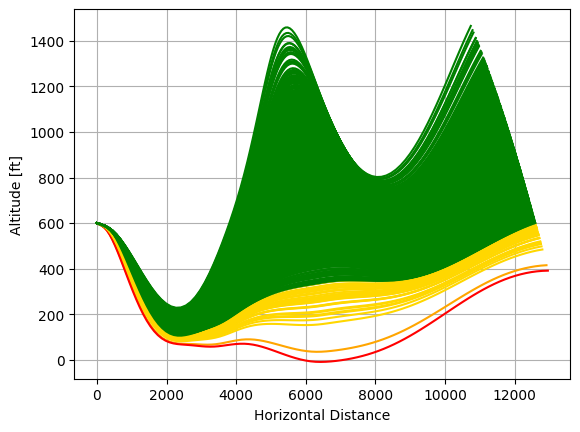

0.2921695032745617 1.9415275054347907
Minimum altitude over all runs: -8.73651593360555


In [193]:
k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h([1])
params = model.params
multipler = 1
u_opt = [float(u) for u in model.u_opt_return(w_opt)]  # Ensure numeric
N = params.nu * multipler
dxt = params.tf / N

# Define dynamics
x1 = SX.sym('x1')  # x
x2 = SX.sym('x2')  # h
x3 = SX.sym('x3')  # V
x4 = SX.sym('x4')  # gamma
x5 = SX.sym('x5')  # alpha
t = SX.sym('t')    # time
u = SX.sym('u')    # control
x = vertcat(x1, x2, x3, x4, x5)

# Wind fields
A1 = -50 + params.a * x1 ** 3 + params.b * x1 ** 4
A2 = 0.025 * (x1 - 2300)
A3 = 50 - params.a * (4600 - x1) ** 3 - params.b * (4600 - x1) ** 4
A4 = 50
A_expr = if_else(x1 <= 500, A1,
                 if_else(x1 <= 4100, A2,
                         if_else(x1 <= 4600, A3, A4)))

B1 = params.d * x1 ** 3 + params.e * x1 ** 4
B2 = -51 * exp(fmin(-params.c * (x1 - 2300) ** 4, 30))
B3 = params.d * (4600 - x1) ** 3 + params.e * (4600 - x1) ** 4
B4 = 0
B_expr = if_else(x1 <= 500, B1,
                 if_else(x1 <= 4100, B2,
                         if_else(x1 <= 4600, B3, B4)))

k_sym = SX.sym('k_sym')
wind_x_expr = k_sym * A_expr
wind_x = Function('wind_x', [x1, k_sym], [wind_x_expr])
wind_h_expr = k_sym * x2 * B_expr / params.h_star
wind_h = Function('wind_h', [x1, x2, k_sym], [wind_h_expr])

dWx_dx = Function("dWx_dx", [x1, k_sym], [gradient(wind_x_expr, x1)])
dWh_dx = Function("dWh_dx", [x1, x2, k_sym], [gradient(wind_h_expr, x1)])
dWh_dh = Function("dWh_dh", [x1, x2, k_sym], [gradient(wind_h_expr, x2)])

# Other forces
C_L = if_else(x5 > params.alpha_star, params.C0 + params.C1 * x5,
              params.C0 + params.C1 * x5 + params.C2 * (x5 - params.alpha_star) ** 2)

beta = if_else(t < params.sigma,
               params.beta0 + params.beta_dot0 * t, 1.0)

T = beta * (params.A0 + params.A1 * x3 + params.A2 * x3 ** 2)
D = 0.5 * (params.B0 + params.B1 * x5 + params.B2 * x5 ** 2) * params.rho * params.S * x3 ** 2
L = 0.5 * params.rho * params.S * C_L * x3 ** 2

# ODE system
x1dot = x3 * cos(x4) + wind_x(x1, k_sym)
x2dot = x3 * sin(x4) + wind_h(x1, x2, k_sym)
wxdot = dWx_dx(x1, k_sym) * x1dot
whdot = dWh_dx(x1, x2, k_sym) * x1dot + dWh_dh(x1, x2, k_sym) * x2dot
x3_safe = fmax(x3, 1e-3)
x3dot = T / params.m * cos(x5 + params.delta) - D / params.m - params.g * sin(x4) - (
            wxdot * cos(x4) + whdot * sin(x4))
x4dot = T / (params.m * x3_safe) * sin(x5 + params.delta) + L / (params.m * x3_safe) - \
        params.g / x3_safe * cos(x4) + (1 / x3_safe) * (wxdot * sin(x4) - whdot * cos(x4))
x5dot = u

f = Function('f', [x, u, t, k_sym], [vertcat(x1dot, x2dot, x3dot, x4dot, x5dot)])

# RK4 integration
def rk4_step(xk, uk, tk, dt, k_val):
    k1 = f(xk, uk, tk, k_val)
    k2 = f(xk + dt / 2 * k1, uk, tk + dt / 2, k_val)
    k3 = f(xk + dt / 2 * k2, uk, tk + dt / 2, k_val)
    k4 = f(xk + dt * k3, uk, tk + dt, k_val)
    return xk + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# Monte Carlo
M = 1000
k_samples = np.random.normal(loc=1.0, scale=0.25, size=M)
min_hs = []

plt.figure()
for i in range(M):
    k_val = k_samples[i]
    X = []
    Xk = DM([0, 600, 239.7, -2.249 * np.pi / 180, 7.353 * np.pi / 180])
    X.extend(Xk.full().flatten())
    Tk = 0

    for k in range(N):
        Xk = rk4_step(Xk, u_opt[k], Tk, dxt, k_val)
        Tk += dxt
        X.extend(Xk.full().flatten())

    x_list = X[0::5]
    h_list = X[1::5]
    min_h = min(h_list)
    min_hs.append(min_h)
    if min_h <= 0:
        color = 'red'
    elif min_h <= 50:
        color = 'orange'
    elif min_h <= 100:
        color = 'gold'
    else:
        color = 'green'
    plt.plot(x_list, h_list,color=color)

plt.xlabel('Horizontal Distance')
plt.ylabel('Altitude [ft]')
plt.grid(True)
plt.show()
print(min(k_samples), max(k_samples))
print("Minimum altitude over all runs:", min(min_hs))


Total number of variables............................:     3101
                     variables with only lower bounds:      601
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      600
Total number of equality constraints.................:     3000
Total number of inequality constraints...............:     1206
        inequality constraints with only lower bounds:      606
   inequality constraints with lower and upper bounds:      600
        inequality constraints with only upper bounds:        0


Number of Iterations....: 470

                                   (scaled)                 (unscaled)
Objective...............:  -7.4258776316238325e+01   -7.4258776316238325e+01
Dual infeasibility......:   5.6325855028943146e-11    5.6325855028943146e-11
Constraint violation....:   9.5191727323642769e-10    1.1444853953435086e-09
Variable bound violation:   9.8063465403530614e-09    9.8063465403530614e-09
Complementar

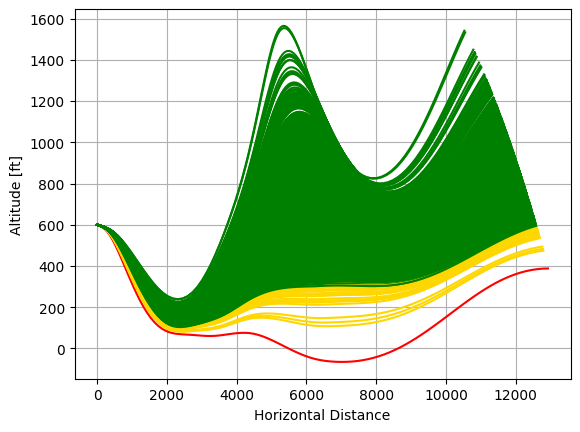

0.19741143147138163 1.9250170765707084
Minimum altitude over all runs: -65.23725993777289


In [200]:
k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
u_opt= model.u_opt_return(w_opt)
min_h = model.simulate_trajectories(u_opt=u_opt, params=model.params, N=N, dxt=dxt, M=1000)
print("Minimum altitude over all runs:", min_h)



# FINAL VERSION

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 46

                                   (scaled)                 (unscaled)
Objective...............:  -5.1310875598186965e+02   -5.1310875598186965e+02
Dual infeasibility......:   1.1327917478997520e-11    1.1327917478997520e-11
Constraint violation....:   2.9121084994399782e-09    3.5012135413126085e-09
Variable bound violation:   9.9845374190721259e-09    9.9845374190721259e-09
Complementari

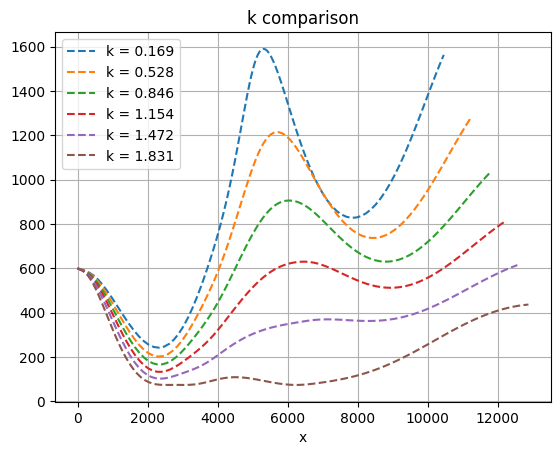

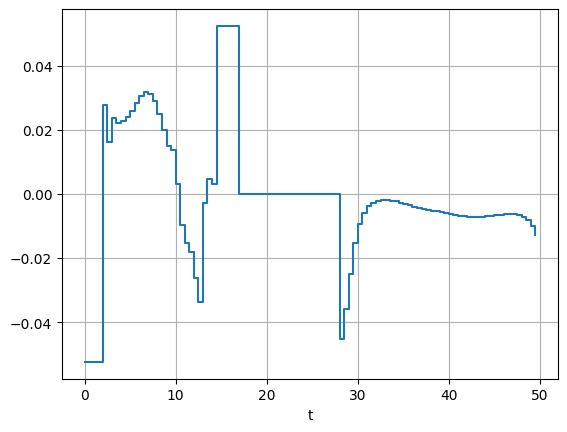

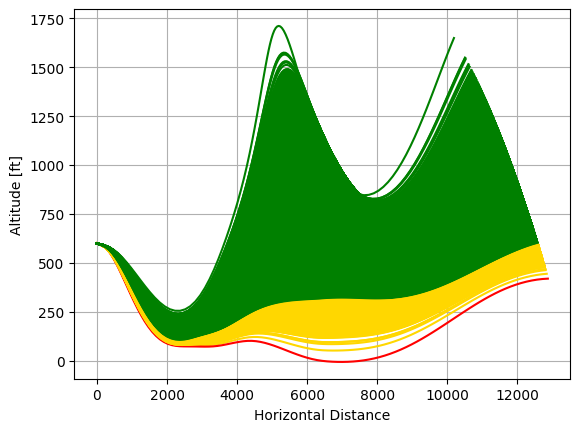

0.05944683945257123 1.8482893512960024
1.8482893512960024
Minimum altitude over all runs: -6.245800659677726


In [231]:

w_opt,_ = model.solve_ocp_multi_plane_min_h([1])
x_opt = w_opt[model.params.nu+1:].tolist()
k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]

w_opt, J_opt = model.solve_ocp_multi_plane_min_h_initial_geuss_help(k_values, x_opt)
model.plot_multi_plane_2D(w_opt,k_values)
u_opt = model.u_opt_return(w_opt)

min_h = model.simulate_trajectories(u_opt=u_opt, params=model.params, N=N, dxt=dxt, M=10000)
print("Minimum altitude over all runs:", min_h)